In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Neural network libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers.legacy import Adam
# metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
# plots 
from matplotlib import pyplot as plt 

In [2]:
link = "./dataset/hoboken.csv"
hoboken = pd.read_csv(link)
hoboscaler = MinMaxScaler()
hoboken.Date = pd.to_datetime(hoboken.Date)
hoboken[['Value']] = hoboscaler.fit_transform(hoboken[['Value']])
hoboken.head()

,Date,Value
0,2015-01-31,0.000000
1,2015-02-28,0.027298
2,2015-03-31,0.039681
3,2015-04-30,0.049087
4,2015-05-31,0.066606


In [3]:
def create_splits(data, lookback=1):
    datax, datay = [],[]
    for i in range(len(data) - lookback -1):
        a = data.iloc[i:(i + lookback), 1]
        datax.append(a)
        datay.append(data.iloc[i + lookback, 1])
    return np.array(datax), np.array(datay)



In [4]:
trainsize = 93
lookback = 3
train, test = hoboken[:trainsize], hoboken[trainsize - lookback:]
train

,Date,Value
0,2015-01-31,0.000000
1,2015-02-28,0.027298
2,2015-03-31,0.039681
3,2015-04-30,0.049087
4,2015-05-31,0.066606
...,...,...
88,2022-05-31,0.647926
89,2022-06-30,0.697129
90,2022-07-31,0.746749
91,2022-08-31,0.765914


In [5]:
trainx, trainy = create_splits(train, lookback=lookback)
testx, testy = create_splits(test, lookback=lookback)

In [6]:
trainx = np.reshape(trainx, (trainx.shape[0], 1, trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0], 1, testx.shape[1]))

In [7]:
hobomodel = Sequential()
hobomodel.add(LSTM(6, input_shape = (1, lookback)))
hobomodel.add(Dense(1))
opt = Adam(learning_rate = 0.01)
hobomodel.compile(loss='mean_squared_error', optimizer=opt)
hobomodel.summary()

2023-12-15 20:39:54.717022: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-15 20:39:54.717043: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-15 20:39:54.717047: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-15 20:39:54.717078: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-15 20:39:54.717093: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6)                 240       
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 247 (988.00 Byte)
Trainable params: 247 (988.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
hobomodel.fit(trainx, trainy, epochs=120)

Epoch 1/120


2023-12-15 20:39:56.086369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 4s 308ms/step - loss: 0.0677
Epoch 2/120
3/3 [==============================] - 0s 9ms/step - loss: 0.0441
Epoch 3/120
3/3 [==============================] - 0s 9ms/step - loss: 0.0287
Epoch 4/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0203
Epoch 5/120
3/3 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 6/120
3/3 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 7/120
3/3 [==============================] - 0s 9ms/step - loss: 0.0177
Epoch 8/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0163
Epoch 9/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0138
Epoch 10/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0113
Epoch 11/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 12/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0082
Epoch 13/120
3/3 [==============================] - 0s 8ms/step - loss:

In [9]:
trainpred = hobomodel.predict(trainx)
print("the mean squared error for the train data is ", mean_squared_error(trainy, trainpred))

3/3 [==============================] - 1s 48ms/step
the mean squared error for the train data is  0.0005628193660717966


In [10]:
ypred = hobomodel.predict(testx)
print("the mean squared error for the test data is ", mean_squared_error(testy, ypred))

1/1 [==============================] - 0s 134ms/step
the mean squared error for the test data is  0.00043490497598578504


In [11]:
print("the r2 score for the test data is ", r2_score(testy, ypred))

the r2 score for the test data is  0.8654697837172434


In [12]:
ypred

array([[0.83581495],
       [0.8539119 ],
       [0.875262  ],
       [0.9006706 ],
       [0.9173685 ],
       [0.9281085 ],
       [0.94446653],
       [0.9673533 ],
       [0.9839941 ],
       [0.98706955],
       [0.98637444]], dtype=float32)

In [13]:
testy

array([0.80479072, 0.82890156, 0.86209326, 0.87296717, 0.89063942,
       0.9123098 , 0.94693842, 0.96030351, 0.96164784, 0.96090185,
       0.9792271 ])

# Plotting the predicted graph 

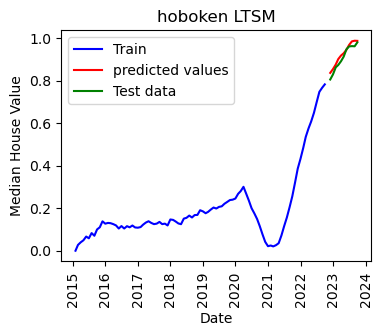

In [14]:
plt.figure(figsize=(4,3))
plt.title("hoboken LTSM")
plt.xlabel('Date')
plt.ylabel('Median House Value')
plt.xticks(rotation='vertical')
plt.plot(train.Date, train.Value, c='blue', label='Train')
plt.plot(test.Date[lookback + 1:], ypred, c='red', label='predicted values')
plt.plot(test.Date[lookback + 1:], testy, c='green', label='Test data')
plt.legend()
plt.show()

# new york dataset

In [15]:
link = './dataset/new york.csv'
newyorkScaler = MinMaxScaler()
new_york = pd.read_csv(link)
new_york.drop(columns='index', axis=1, inplace=True)
new_york[['Value']] = newyorkScaler.fit_transform(new_york[['Value']])

In [16]:
lookback=2
trainx, trainy = create_splits(train, lookback=lookback)
testx, testy = create_splits(test, lookback=lookback)
trainx = np.reshape(trainx, (trainx.shape[0], 1, trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0], 1, testx.shape[1]))

In [17]:
new_york

,Date,Value
0,2015-01-31,0.056079
1,2015-02-28,0.075107
2,2015-03-31,0.089488
3,2015-04-30,0.105672
4,2015-05-31,0.113027
...,...,...
100,2023-05-31,1.000000
101,2023-06-30,0.997609
102,2023-07-31,0.990277
103,2023-08-31,0.981763


In [35]:
modelny = Sequential()
modelny.add(LSTM(7, input_shape = (1, lookback)))
modelny.add(Dense(1))
opt = Adam(learning_rate = 0.01)
modelny.compile(loss='mean_squared_error', optimizer=opt)
modelny.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7)                 280       
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 288 (1.12 KB)
Trainable params: 288 (1.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
modelny.fit(trainx, trainy, epochs= 120, batch_size=1)

Epoch 1/120
90/90 [==============================] - 3s 6ms/step - loss: 0.0271
Epoch 2/120
90/90 [==============================] - 1s 6ms/step - loss: 4.4731e-04
Epoch 3/120
90/90 [==============================] - 1s 6ms/step - loss: 1.3985e-04
Epoch 4/120
90/90 [==============================] - 1s 6ms/step - loss: 1.7763e-04
Epoch 5/120
90/90 [==============================] - 1s 6ms/step - loss: 2.4698e-04
Epoch 6/120
90/90 [==============================] - 1s 6ms/step - loss: 1.6271e-04
Epoch 7/120
90/90 [==============================] - 1s 6ms/step - loss: 1.8071e-04
Epoch 8/120
90/90 [==============================] - 1s 6ms/step - loss: 2.3160e-04
Epoch 9/120
90/90 [==============================] - 1s 6ms/step - loss: 1.8792e-04
Epoch 10/120
90/90 [==============================] - 1s 6ms/step - loss: 2.2218e-04
Epoch 11/120
90/90 [==============================] - 1s 6ms/step - loss: 2.3741e-04
Epoch 12/120
90/90 [==============================] - 1s 6ms/step - loss: 2.75

In [37]:
trainpred = modelny.predict(trainx)
print("the mean squared error for the train data is ", mean_squared_error(trainy, trainpred)) 

3/3 [==============================] - 1s 39ms/step
the mean squared error for the train data is  0.00013236902677290547


In [38]:
ypred = modelny.predict(testx)
print("the mean squared error for the test data is ", mean_squared_error(testy, ypred))

1/1 [==============================] - 0s 155ms/step
the mean squared error for the test data is  2.415669147192614e-05


In [39]:
print("the r2 score for the test data is ", r2_score(testy, ypred))

the r2 score for the test data is  0.9420179545751441


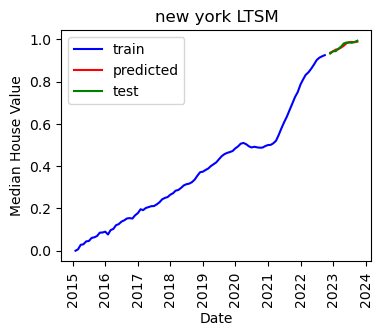

In [40]:
plt.figure(figsize=(4,3))
plt.title("new york LTSM")
plt.xlabel('Date')
plt.ylabel('Median House Value')
plt.xticks(rotation='vertical')
plt.plot(train.Date, train.Value, c='blue', label='train')
plt.plot(test.Date[lookback + 1:], ypred, c='red', label='predicted')
plt.plot(test.Date[lookback + 1:], testy, c='green', label='test')
plt.legend()

In [24]:
ypred

array([[0.77619565],
       [0.7869915 ],
       [0.8063835 ],
       [0.8237171 ],
       [0.84902287],
       [0.84818554],
       [0.86165583],
       [0.8761084 ],
       [0.9000851 ],
       [0.9006548 ],
       [0.89755714],
       [0.8964789 ]], dtype=float32)

# Neural netowrk for philly 

In [25]:
link = './dataset/philly.csv'
philly = pd.read_csv(link)
phillyScaler = MinMaxScaler()
philly.Date = pd.to_datetime(philly.Date)
philly[['Value']] = phillyScaler.fit_transform(philly[['Value']])
philly

,Date,Value
0,2015-01-31,0.000000
1,2015-02-28,0.006385
2,2015-03-31,0.028056
3,2015-04-30,0.030388
4,2015-05-31,0.044152
...,...,...
100,2023-05-31,0.985073
101,2023-06-30,0.983537
102,2023-07-31,0.987586
103,2023-08-31,0.993479


In [26]:
trainsize = 93
lookback = 2
train, test = philly[:trainsize], philly[trainsize - lookback:]
train

,Date,Value
0,2015-01-31,0.000000
1,2015-02-28,0.006385
2,2015-03-31,0.028056
3,2015-04-30,0.030388
4,2015-05-31,0.044152
...,...,...
88,2022-05-31,0.880378
89,2022-06-30,0.901562
90,2022-07-31,0.913210
91,2022-08-31,0.919792


In [27]:
lookback=2
trainx, trainy = create_splits(train, lookback=lookback)
testx, testy = create_splits(test, lookback=lookback)
trainx = np.reshape(trainx, (trainx.shape[0], 1, trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0], 1, testx.shape[1]))

# model creation

In [28]:
phillymodel = Sequential()
phillymodel.add(LSTM(4, input_shape = (1, lookback)))
phillymodel.add(Dense(1))
opt = Adam(learning_rate = 0.01)
phillymodel.compile(loss='mean_squared_error', optimizer=opt)
phillymodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4)                 112       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 117 (468.00 Byte)
Trainable params: 117 (468.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
phillymodel.fit(trainx, trainy, epochs=120)

Epoch 1/120
3/3 [==============================] - 3s 264ms/step - loss: 0.1568
Epoch 2/120
3/3 [==============================] - 0s 10ms/step - loss: 0.1161
Epoch 3/120
3/3 [==============================] - 0s 9ms/step - loss: 0.0830
Epoch 4/120
3/3 [==============================] - 0s 9ms/step - loss: 0.0587
Epoch 5/120
3/3 [==============================] - 0s 9ms/step - loss: 0.0408
Epoch 6/120
3/3 [==============================] - 0s 9ms/step - loss: 0.0318
Epoch 7/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0275
Epoch 8/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0281
Epoch 9/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0287
Epoch 10/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0277
Epoch 11/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0247
Epoch 12/120
3/3 [==============================] - 0s 8ms/step - loss: 0.0207
Epoch 13/120
3/3 [==============================] - 0s 8ms

In [30]:
trainpred = phillymodel.predict(trainx)
print("The train mse is", mean_squared_error(trainy, trainpred))

3/3 [==============================] - 1s 49ms/step
The train mse is 0.00015093634410613484


In [31]:
ypred = phillymodel.predict(testx)
print("the test mse is ", mean_squared_error(testy, ypred))

1/1 [==============================] - 0s 128ms/step
the test mse is  0.00011601225224911076


In [32]:
print("The r2 score for the test data is ",r2_score(testy, ypred))

The r2 score for the test data is  0.7215418474187505


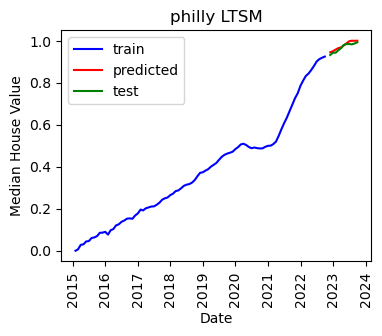

In [33]:
plt.figure(figsize=(4,3))
plt.title("philly LTSM")
plt.xlabel('Date')
plt.ylabel('Median House Value')
plt.xticks(rotation='vertical')
plt.plot(train.Date, train.Value, c='blue', label='train')
plt.plot(test.Date.iloc[lookback + 1:], ypred, c='red', label='predicted')
plt.plot(test.Date[lookback + 1:], testy, c='green', label='test')
plt.legend()

In [34]:
len(test)

14